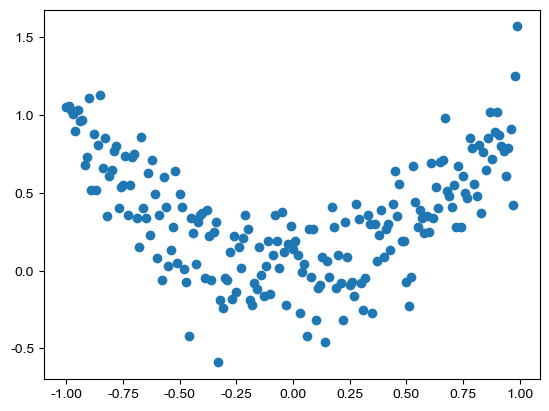

In [6]:
import pandas as pd #导入Pandas
import numpy as np #导入NumPy
import matplotlib.pyplot as plt #导入绘图工具
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'Heiti TC']  # macOS 中文字体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
df = pd.read_csv('特征构建示意数据集.csv') #导入数据
plt.scatter(df.X, df.Y) #X，Y散点图

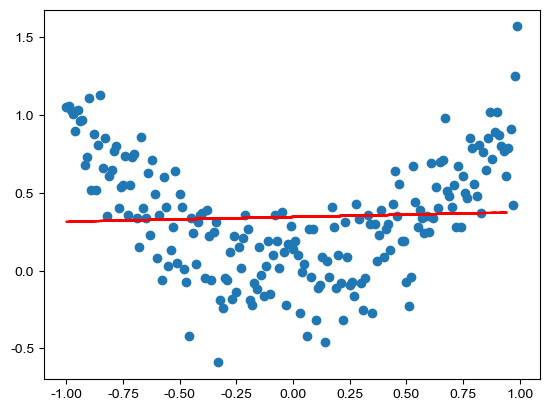

In [7]:
from sklearn.model_selection import train_test_split #导入train_test_split 
df_x = df['X'].to_frame() #特征集
df_y = df['Y'] #标签集
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.3, random_state = 0) #拆分数据集
from sklearn.linear_model import LinearRegression #导入LinearRegression
model = LinearRegression() #创建模型
model.fit(X_train, y_train) #拟合模型
plt.scatter(df.X, df.Y) #散点图
plt.plot(X_test, model.predict(X_test),linestyle='--', color = 'red') #显示拟合曲线

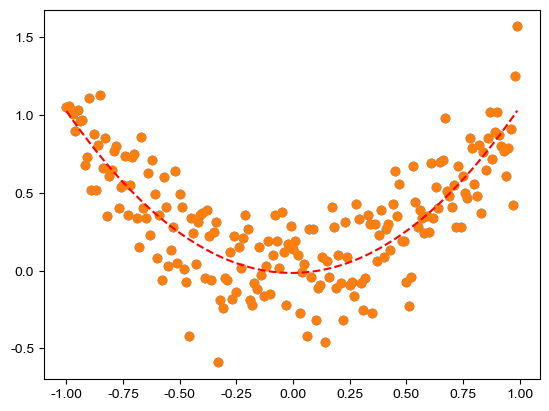

In [8]:
X2_train = X_train.copy() #新特征训练集
X2_test = X_test.copy() #新特征测试集
X2_train['X2'] = X2_train['X']**2 #构建新特征X2
X2_test['X2'] = X2_test['X']**2 #构建新特征X2
model2 = LinearRegression() #创建新模型
model2.fit(X2_train, y_train) #拟合新模型
plt.scatter(df.X, df.Y) #散点图
plt.scatter(df.X, df.Y, label='原始数据')  # 散点图

# 生成平滑曲线的点
X_line = np.linspace(df.X.min(), df.X.max(), 100).reshape(-1, 1)
X_line_df = pd.DataFrame({'X': X_line.flatten(), 'X2': (X_line**2).flatten()})

plt.plot(X_line, model2.predict(X_line_df), '--', color='red', label='拟合曲线')